# Stock Market Trend Forecasting

## Hidden Markov Models for Stock Indexes Forecasting




The goal of this project is to use Hidden Markov Models (HMMs) to analyse most important American stock indices, namely the S&P 500, NASDAQ, Dow Jones, and Russell 2000. I'll start by giving a simple introduction of how HMMs function. 
Then, I'll implement Python code to apply HMMs to the financial indices. 
By analysing historical data, i seek to uncover previously unknown trends and regimes.
To put our model to the test, i will implement a simple trading strategy. This will allow to evaluate the effectiveness of HMMs in real-world applications by examining how well the model's inferred states can drive trading decisions.


### Introduction to Hidden Markov Models

Hidden Markov Models (HMMs) are a type of statistical framework used to describe systems in which certain underlying elements are hidden. 
Essentially, an HMM is designed to follow the course of visible and measurable events, despite the fact that these events are shaped by unseen factors that change over time. 
These invisible elements, known as hidden states, are critical for the model since they drive the sequence of observable events despite not being directly observable.

Hidden Markov Models (HMM) have been demonstrated to be capable of predicting and analysing time-based phenomena, making them extremely valuable in financial market prediction. 

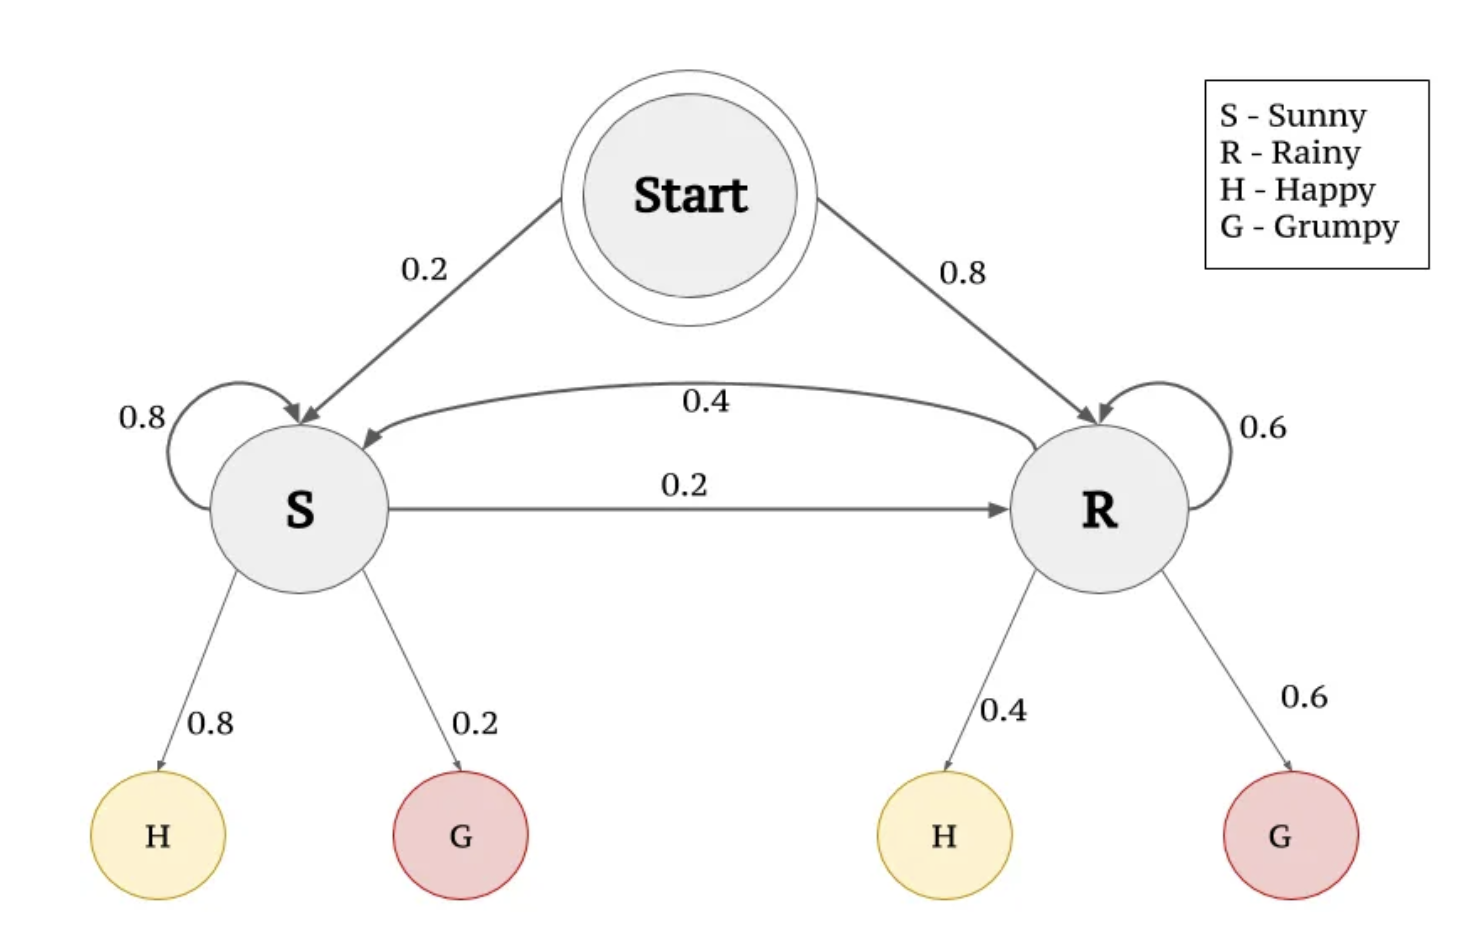 


The graphic shows an example of a Hidden Markov Model (HMM), in which the states indicating the weather are hidden from direct observation. This HMM contains two hidden states, Sunny and Rainy. Each state has transition probabilities to itself and to the other state, which indicate whether the weather will remain the same or change the following day.

From the "Start" state, there are transitions to "S" and "R" with probabilities of 0.8 and 0.2, indicating whether the day will be sunny or rainy.
The Sunny has an 80% probability of being sunny the next day, and a 20% probability of becoming rainy.
The Rainy has a 60% probability of remaining rainy the next day, and a 40% probability of turning sunny.

There are also the visible outcomes, which in this HMM are represented by the feelings "Happy" (H) and "Grumpy" (G).  The probabilities leading to these observations are shown in the figure,  they represent the possibility of detecting the feeling given the hidden weather condition for that day.

We cannot directly see the weather, but we can infer it from an individual's mood, which acts as an indirect measurement. This feature is crucial to HMMs, because the goal consist in deducing the hidden states from the observations.

In financial markets, Hidden Markov Models (HMMs) function like weather forecasting. Just as we infer weather from mood, HMMs deduce hidden market states from observed data to make informed investment decisions by using  measurements like daily performance.

## Python Code

yfinance: Used to download financial data from Yahoo Finance, including historical and real-time market data, which is required for stock market analysis.

NumPy: Required for mathematical and statistical operations

Pandas: is for data manipulation, working with structured data such as time series data, and conducting cleaning, aggregation, and visualisation.

hmmlearn: Enables the development and training of Hidden Markov Models (HMMs) 

matplotlib.pyplot : For visualising financial data

scipy.stats: Provides statistical functions for analysing data distributions of financial data.

random: Used for generating random numbers or selections

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis
import random

The seed is setted to male the random numbers sequence deterministic, 
in this way we will get the same sequence of random numbers when running the code with the same seed

In [2]:
# Imposta il seed casuale per numpy e random
np.random.seed(414342)
random.seed(414342)

In [3]:
class HiddenMarkovModel:
    def __init__(self, stock_symbol, start_date, end_date):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date
        self.data = None
        self.log_return_data = None
        self.original_data = None
        self.model = None

    def load_data(self):
        # Dowbload Index data from Yahoo Finance 
        print()
        self.data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)

    def calculate_returns_log_and_linear(self):
        # Compute log returns to be used as input for the model
        self.data[f'{self.stock_symbol} log_return'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.log_return_data = self.data[f'{self.stock_symbol} log_return'].dropna().to_numpy().reshape(-1, 1)

        # Compute simple returns to be used at the end to compute the performance of the strategy implemented 
        self.data[f'{self.stock_symbol} linear_return'] = self.data['Close'].pct_change()
        self.linear_return_data = self.data[f'{self.stock_symbol} linear_return'].dropna().to_numpy().reshape(-1, 1)

        self.original_data = self.data.copy()

    def fit_hmm_model(self, n_components, test_size=0.30):
        stock_symbol_name = stock_symbols.get(stock_symbol)
        print()
        print("*********************************************")
        print()
        print(f"Analyzing {stock_symbol_name} Returns.....")
        print()
        print("*********************************************")
        print()
        # We need to divide data between train set and test set in order to 
        # understand how the model is able to generalize on new data 
        
        train_size = int((1 - test_size) * len(self.log_return_data))
        train_data = self.log_return_data[:train_size]
        test_data = self.log_return_data[train_size:]


        # The  two following lines are used to train and fit the model
        # The first line creates an instance of a GaussianHMM. The arguments presented are:
        # n_components specifies how many latent states exist in the model (3 in this case)
        # covariance_type="full" specifies that each component will have its own general covariance matrix, 
        # allowing the model to capture all characteristics of the data's covariance structure.
        # n_iter=1000000 specifies the maximum number of iterations for fitting the model to the data. 
        # The second line regards model's training 
        # The fit approach adjusts the model's parameters based on the training data provided. 
        # The fit method will use the number of components and covariance type specified in the model 
        # initialization to determine the optimal fitting parameters based on the HMM's learning algorithm.
        
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000000)
        self.model.fit(train_data)

        # Evaluate the model by printing its score related to the performance on the test set
        test_score = self.model.score(test_data)
        print(f"Test Score of: {test_score}")

        # Forecast the hidden test by using the trained HMM model
        # In a Hidden Markov Model (HMM), the calculation of hidden states is based on the idea of information 
        # propagation. The algorithm, known as the Viterbi algorithm, starts with the first observation and 
        # calculates the probabilities of possible hidden states based on that observation alone. It then uses 
        # these probabilities to determine the most likely hidden state at that point.
        # When it moves to the second observation, it uses information about the previously determined hidden 
        # state (based on the first observation) to calculate the probabilities of possible new hidden states 
        # based on the second observation. It combines these probabilities with the previous information to 
        # determine the new most likely hidden state.
        # This process is repeated iteratively for each subsequent observation in the sequence, so each step 
        # takes into account information accumulated from previous steps. Eventually, you get the sequence of 
        # hidden states that maximizes the cumulative probability given all the observations, considering 
        # information from previous states consistently.
        # In this way, the HMM progressively integrates information from the past to make more 
        # accurate predictions about future states.
        
        test_states = self.model.predict(test_data)
        

        # Create a DataFrame in order to store data
        self.test_data_df = self.original_data.iloc[train_size:].copy()
        self.test_data_df = self.test_data_df.drop(self.test_data_df.index[0])

        # Add a column State 
        self.test_data_df['State'] = test_states

        # Computer AIC and BIC on train data to compare on which index the model performs better
        aic = self.model.aic(train_data)
        bic = self.model.bic(train_data)
        print()
        print(f"AIC of {stock_symbol_name}: {aic}")
        print()
        print(f"BIC of {stock_symbol_name}: {bic}")
        print()
        # Print other informations about the model
        print()
        # I decided to print the transition probability matrix in order to have an idea about the 
        # chances to move from one state to another 
        print("Transition Probability Matrix: ")
        print()
        rounded_transmat = np.round(self.model.transmat_, 8)
        print(rounded_transmat)
        print()

        print(f"{stock_symbol_name} Means and Variances of the states:")
        print()
        for i in range(self.model.n_components):
            mean = round(self.model.means_[i][0], 5)
            variance = round(np.diag(self.model.covars_[i])[0], 5)
            print(f"State {i}: mean = {mean}, variance = {variance}")
            print()

        return self.test_data_df
    
    print()
    print()
    
    state_colors = ['green', 'orange', 'red']

    def calculate_test_log_returns(self):
        #Compute the log_returns for test_data_df by using Close price column
        self.test_data_df['log_return'] = np.log(self.test_data_df['Close'] / self.test_data_df['Close'].shift(1))
        self.test_data_df['log_return'].fillna(0,inplace=True)  # Set eventually NaN values on 0
        

    def plot_test_with_states(self):
        # Here i want to plot log_returns filtered by states to see if the model is able to capture difference regimes 
        stock_symbol_name = stock_symbols.get(self.stock_symbol)
        plt.figure(figsize=(10, 5))
        for i in range(self.model.n_components):
            pos = (self.test_data_df['State'] == i)  
            plt.plot(self.test_data_df.index[pos], self.test_data_df[f'{stock_symbol} log_return'][pos],
                     ".", label=f"State {i}", color=self.state_colors[i])

        plt.title(f"{stock_symbol_name} Log Returns with Decoded States")
        plt.legend()
        plt.show()


    def plot_state_with_distributions(self):
        # The function visualises hidden state probability distributions by computing their means, 
        # variances, skewness, and kurtosis. 
        #It helps to better comprehend state characteristics, compare states and improve 
        # interpretability for market analysis.
        
        states = []
        means = []
        variances = []


        for i in range(self.model.n_components):
            state = i
            mean = round(self.model.means_[i][0], 5)
            variance = round(np.diag(self.model.covars_[i])[0], 5)
            states.append(state)
            means.append(mean)
            variances.append(variance)

        stock_symbol_name = stock_symbols.get(self.stock_symbol)
        # I want to plot the hidden states distributions 
        # Using these data points, the function shows the normal distribution's 
        # probability density function (PDF). The resulting plot shows the probability 
        # distribution associated with each hidden state, offering information about their features. 
        print()
        print()
        print(f"{stock_symbol_name} Skewness and Kurtosis of the states:")
        for (state, mean, variance) in zip(states, means, variances):
            data = np.random.normal(mean, np.sqrt(variance), 10000)
            skewness = skew(data)
            kurt = kurtosis(data)
            print()
            print(f'State {state}: Skewness = {skewness}, Kurtosis = {kurt}')
            print()

        plt.figure(figsize=(10, 5))
        for (state, mean, variance) in zip(states, means, variances):
            x = np.linspace(mean - 3 * np.sqrt(variance), mean + 3 * np.sqrt(variance), 10000)
            plt.plot(x, norm.pdf(x, mean, np.sqrt(variance)), label=f'State {state}', color=self.state_colors[state])

        plt.title(f'{stock_symbol_name} States with distributions')
        plt.legend()
        plt.show()



    def plot_close_prices_with_states(self):
        stock_symbol_name = stock_symbols.get(self.stock_symbol)

        # Predict the hidden states based on the log return data for the test data
        hidden_states = self.model.predict(self.log_return_data[-len(self.test_data_df):])

        # Plotting setup
        plt.figure(figsize=(10, 5))
        for i in range(self.model.n_components):
            pos = (hidden_states == i)
            plt.scatter(self.test_data_df.index[pos], self.test_data_df['Close'][pos], label=f'State {i}',
                        s=10, alpha=0.6, color=self.state_colors[i])
        plt.legend()
        plt.title(f"{stock_symbol_name} Close Price with Decoded States (Test Data)")
        plt.show()


    def encode_states(self):
        # Computer menas of the log returns state by state 
        state_means = [np.mean(self.test_data_df[self.test_data_df['State'] == i]['log_return']) for i in
                       range(self.model.n_components)]

        # The aim was to order states to easily implement the strategy
        # I thought that by ordering the states using their means, i was easily able to see which 
        # is the bullish, neutral and nearish state
        sorted_states = np.argsort(state_means)

        # Assign name to the states 
        state_mapping = {sorted_states[2]: "bullish", sorted_states[0]: "bearish", sorted_states[1]: "neutral"}

        # These lines establish a new column in the DataFrame, replacing each original value 
        #in the State column with the corresponding value defined in state_mapping. 
        #The conversion of numeric to categorical attributes is more useful.
        
        self.test_data_df['Encoded_State'] = self.test_data_df['State'].map(state_mapping)
        

    def check_correct_states_encoding(self):
        # Compute the means before the encoding
        state_means_before = []
        for i in range(self.model.n_components):
            state_mean = np.mean(self.test_data_df[self.test_data_df['State'] == i]['log_return'])
            state_means_before.append(state_mean)

        # Compute the means after the encoding
        state_means_after = []
        labels = ["bullish", "bearish", "neutral"]
        for label in labels:
            state_mean = np.mean(self.test_data_df[self.test_data_df['Encoded_State'] == label]['log_return'])
            state_means_after.append(state_mean)

        # Print the means before the encoding
        print()
        print("States means before the encoding:")
        for i, mean in enumerate(state_means_before):
            print(f"State {i}: {round(mean, 5)}")
            print()

        # Print the means after the encoding
        print()
        print("State means after the encoding:")
        for label, mean in zip(["bullish", "bearish", "neutral"], state_means_after):
            print(f"{label}: {round(mean, 5)}")
            print()
        
        # The aim of the method "Check correct states encoding" is to see if the encoding process has been done correctly. 



In [4]:
class TradingStrategy:
    def __init__(self, hmm_model):
        self.hmm_model = hmm_model
        self.trade_log = pd.DataFrame(columns=['Date', 'Action', 'Portfolio_Percentage', 'Open_Price'])

    def implement_trading_strategy(self):
        test_data_df = self.hmm_model.test_data_df
        current_state = None

        for i in range(len(test_data_df) - 1):
            date = test_data_df.index[i + 1]
            next_day_open_price = test_data_df["Open"].iloc[i + 1]
            next_day_state = test_data_df["Encoded_State"].iloc[i + 1]

            if current_state is None:
                current_state = test_data_df["Encoded_State"].iloc[i]

            action, portfolio_percentage = self.determine_action(current_state, next_day_state)

            new_row = pd.DataFrame({
                'Date': [date],
                'Action': [action],
                'Portfolio_Percentage': [portfolio_percentage],
                'Open_Price': [next_day_open_price]
            })

            self.trade_log = pd.concat([self.trade_log, new_row], ignore_index=True)

            current_state = next_day_state

        return self.trade_log

    def determine_action(self, current_state, next_day_state):
        
        #Determine the trading action and portfolio percentage based on the current state
        # and the state of the next day.
        
        if current_state == "bullish":
            if next_day_state == "bullish":
                return "Hold", 1.0
            elif next_day_state == "neutral":
                return "Sell Half", 0.5
            elif next_day_state == "bearish":
                return "Sell All", 0.0

        elif current_state == "neutral":
            if next_day_state == "bullish":
                return "Buy 100%", 1.0
            elif next_day_state == "neutral":
                return "Hold", 0.5
            elif next_day_state == "bearish":
                return "Sell All", 0.0

        elif current_state == "bearish":
            if next_day_state == "bullish":
                return "Buy 100%", 1.0
            elif next_day_state == "neutral":
                return "Buy Half", 0.5
            elif next_day_state == "bearish":
                return "Hold", 0.0

        # Default action if state is not recognized
        return "Hold", self.trade_log['Portfolio_Percentage'].iloc[-1] if not self.trade_log.empty else 0.0

    def plot_portfolio_weights(self, trading_log):
        stock_symbol_name = stock_symbols.get(stock_symbol)
        plt.figure(figsize=(6, 3))
        plt.plot(trading_log['Date'], trading_log['Portfolio_Percentage'], marker='o', linestyle='-')
        plt.title(f'{stock_symbol_name} Strategy Weights Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percentage of Assets invested')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def calculate_strategy_positions_time(self, trading_log):
        stock_symbol_name = stock_symbols.get(stock_symbol)

        # Calcola la percentuale di 1, 0.5 e 0
        count_1 = 0
        count_0_5 = 0
        count_0 = 0
        total_count = len(trading_log)

        for value in trading_log['Portfolio_Percentage']:
            if value == 1.0:
                count_1 += 1
            elif value == 0.5:
                count_0_5 += 1
            else:
                count_0 +=1

        percentage_1 = round((count_1 / total_count) * 100, 2)
        percentage_0_5 = round((count_0_5 / total_count) * 100, 2)
        percentage_0 = round((count_0 / total_count) * 100, 2)

        print(f"The {stock_symbol_name} strategy stayed fully invested: {percentage_1}% of the time")
        print(f"The {stock_symbol_name} strategy stayed half invested: {percentage_0_5}% of the time")
        print(f"The {stock_symbol_name} strategy did not have any position: {percentage_0}% of the time")




In [5]:
def calculate_daily_performance(trading_log):
    # This row compute the Open price variation considering consecutive days
    # The operation can be done only the next day, the first available price to make buy/sell orders is the open price
    trading_log['Open_Price_Change'] = trading_log['Open_Price'].pct_change()

    # Starting Holdings are 0
    trading_log['Portfolio_Change'] = 0.0

    # Compute Performance
    for i in range(1, len(trading_log)):
        if trading_log.at[i, 'Action'] == 'Buy 100%':
            trading_log.at[i, 'Portfolio_Change'] = trading_log.at[i, 'Open_Price_Change']
        elif trading_log.at[i, 'Action'] == 'Buy Half':
            trading_log.at[i, 'Portfolio_Change'] = trading_log.at[i, 'Open_Price_Change'] * 0.5
        elif trading_log.at[i, 'Action'] == 'Sell Half':
            trading_log.at[i, 'Portfolio_Change'] = trading_log.at[i, 'Open_Price_Change'] * 0.5
        elif trading_log.at[i, 'Action'] == 'Sell All':
            trading_log.at[i, 'Portfolio_Change'] = 0
        else:
            # Assumiamo che 'Hold' e altre azioni non specificate mantengano la stessa percentuale del giorno precedente
            trading_log.at[i, 'Portfolio_Change'] = trading_log.at[i, 'Open_Price_Change'] * trading_log.at[
                i - 1, 'Portfolio_Percentage']

    # Calcolare la performance cumulativa
    trading_log['Cumulative_Performance'] = (1 + trading_log['Portfolio_Change']).cumprod() - 1
    trading_log['Total_Performance'] = trading_log['Portfolio_Change'].cumsum()


    return trading_log


def plot_portfolio_performance(trading_log):
    stock_symbol_name = stock_symbols.get(stock_symbol)
    # Calcola la performance di "Buy and Hold"
    trading_log['Buy_and_Hold_Performance'] = trading_log['Open_Price'] / trading_log['Open_Price'].iloc[0] - 1
    plt.figure(figsize=(10, 5))
    # Plotta la performance cumulativa del portafoglio
    plt.plot(trading_log['Date'], trading_log['Cumulative_Performance'], label='Trading Strategy Performance')
    # Plotta la performance totale (semplice) del portafoglio
    plt.plot(trading_log['Date'], trading_log['Total_Performance'], label='Trading Strategy (Simple) Performance')
    # Plotta la performance di "Buy and Hold"
    plt.plot(trading_log['Date'], trading_log['Buy_and_Hold_Performance'], label=f'Buy and Hold {stock_symbol_name}', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Performance')
    plt.title(f'{stock_symbol_name} -- Cumulative vs Simple vs Buy&Hold Over Time')
    plt.legend()
    plt.show()



[*********************100%***********************]  1 of 1 completed

*********************************************

Analyzing S&P 500 Returns.....

*********************************************

Test Score of: 7749.190587938331

AIC of S&P 500: -35440.45346256083

BIC of S&P 500: -35347.97547833236


Transition Probability Matrix: 

[[0.98771431 0.01228569 0.        ]
 [0.01645406 0.9771714  0.00637455]
 [0.         0.03130098 0.96869902]]

S&P 500 Means and Variances of the states:

State 0: mean = 0.00084, variance = 4e-05

State 1: mean = -5e-05, variance = 0.00015

State 2: mean = -0.00181, variance = 0.0008



S&P 500 Skewness and Kurtosis of the states:

State 0: Skewness = 0.03859290499120448, Kurtosis = 0.07805050500763189


State 1: Skewness = 0.0009131004452334179, Kurtosis = -0.058849358754879955


State 2: Skewness = -0.015029937468729162, Kurtosis = -0.015966357045980928



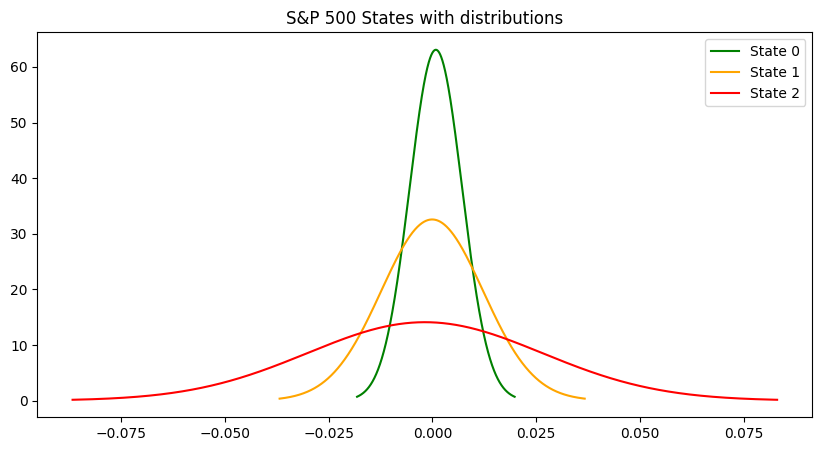

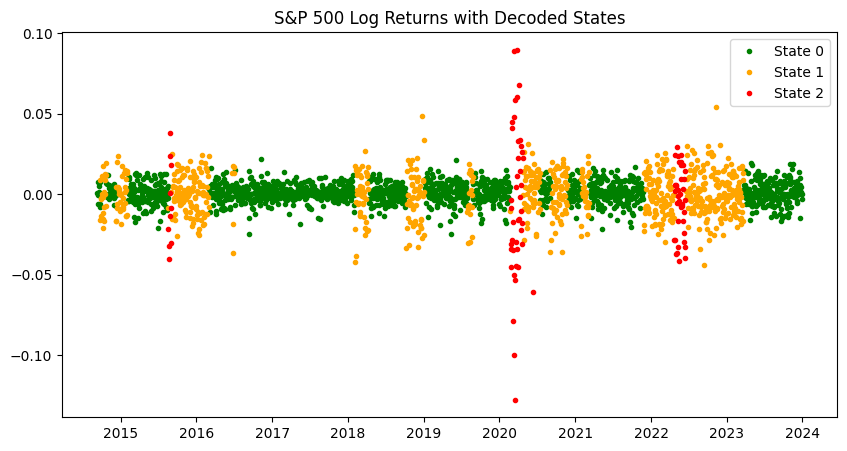

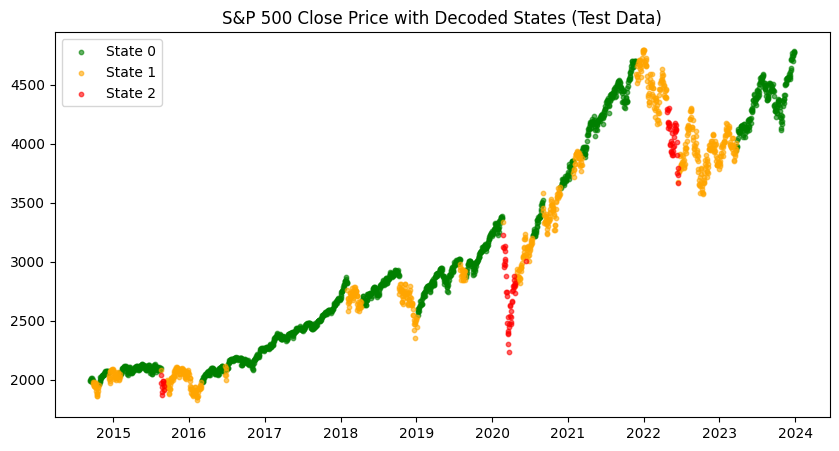


States means before the encoding:
State 0: 0.00092

State 1: -4e-05

State 2: -0.00524


State means after the encoding:
bullish: 0.00092

bearish: -0.00524

neutral: -4e-05



/var/folders/yv/d2dhvmn114n1xwsyx1cdm1380000gn/T/ipykernel_42537/1650987279.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.trade_log = pd.concat([self.trade_log, new_row], ignore_index=True)


           Date Action  Portfolio_Percentage   Open_Price
0    2014-09-12   Hold                   1.0  1996.739990
1    2014-09-15   Hold                   1.0  1986.040039
2    2014-09-16   Hold                   1.0  1981.930054
3    2014-09-17   Hold                   1.0  1999.300049
4    2014-09-18   Hold                   1.0  2003.069946
...         ...    ...                   ...          ...
2336 2023-12-22   Hold                   1.0  4753.919922
2337 2023-12-26   Hold                   1.0  4758.859863
2338 2023-12-27   Hold                   1.0  4773.450195
2339 2023-12-28   Hold                   1.0  4786.439941
2340 2023-12-29   Hold                   1.0  4782.879883

[2341 rows x 4 columns]


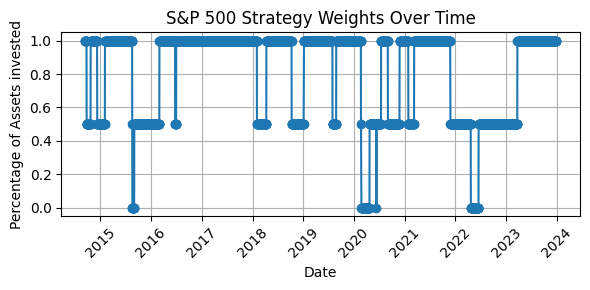

The S&P 500 strategy stayed fully invested: 64.08% of the time
The S&P 500 strategy stayed half invested: 31.99% of the time
The S&P 500 strategy did not have any position: 3.93% of the time

Final Cumulative Performance of the strategy is: 320.67%
Final 'Simple' Performance of the strategy is: 147.88%


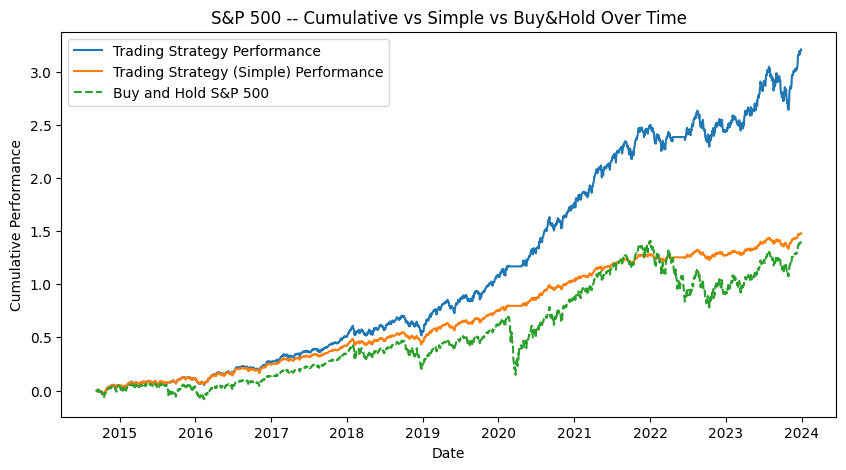


[*********************100%***********************]  1 of 1 completed

*********************************************

Analyzing Dow Jones 30 Returns.....

*********************************************



Model is not converging.  Current: 17928.528241684595 is not greater than 17928.7649453602. Delta is -0.23670367560407612


Test Score of: 7818.851116356384

AIC of Dow Jones 30: -35828.29532367656

BIC of Dow Jones 30: -35735.81733944809


Transition Probability Matrix: 

[[0.95742458 0.04257542 0.        ]
 [0.00625883 0.97608785 0.01765333]
 [0.         0.01153953 0.98846047]]

Dow Jones 30 Means and Variances of the states:

State 0: mean = -0.00245, variance = 0.00088

State 1: mean = -3e-05, variance = 0.00015

State 2: mean = 0.00078, variance = 4e-05



Dow Jones 30 Skewness and Kurtosis of the states:

State 0: Skewness = 0.0011013309710682887, Kurtosis = -0.09745470073354268


State 1: Skewness = -0.010477289699875847, Kurtosis = -0.028026030839295668


State 2: Skewness = -0.004051800305431644, Kurtosis = -0.028673077946658854



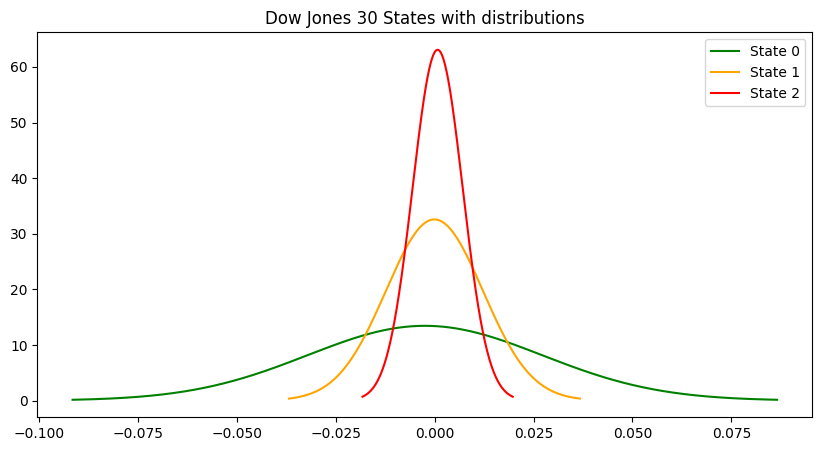

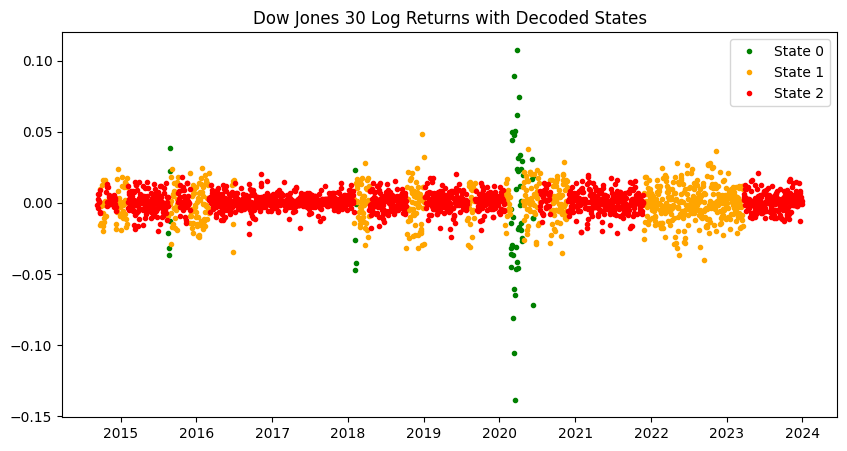

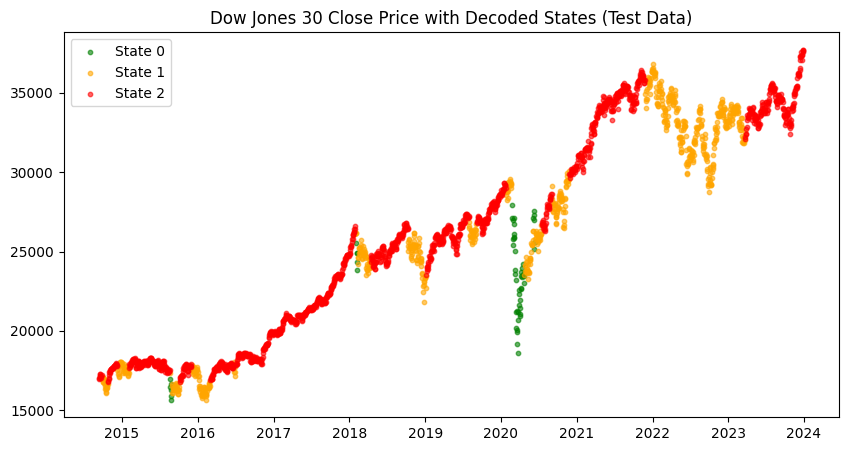


States means before the encoding:
State 0: -0.00629

State 1: -0.00017

State 2: 0.00084


State means after the encoding:
bullish: 0.00084

bearish: -0.00629

neutral: -0.00017



/var/folders/yv/d2dhvmn114n1xwsyx1cdm1380000gn/T/ipykernel_42537/1650987279.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.trade_log = pd.concat([self.trade_log, new_row], ignore_index=True)


           Date Action  Portfolio_Percentage    Open_Price
0    2014-09-12   Hold                   1.0  17044.050781
1    2014-09-15   Hold                   1.0  16988.759766
2    2014-09-16   Hold                   1.0  17027.160156
3    2014-09-17   Hold                   1.0  17131.009766
4    2014-09-18   Hold                   1.0  17163.730469
...         ...    ...                   ...           ...
2336 2023-12-22   Hold                   1.0  37349.269531
2337 2023-12-26   Hold                   1.0  37405.898438
2338 2023-12-27   Hold                   1.0  37518.621094
2339 2023-12-28   Hold                   1.0  37661.519531
2340 2023-12-29   Hold                   1.0  37701.628906

[2341 rows x 4 columns]


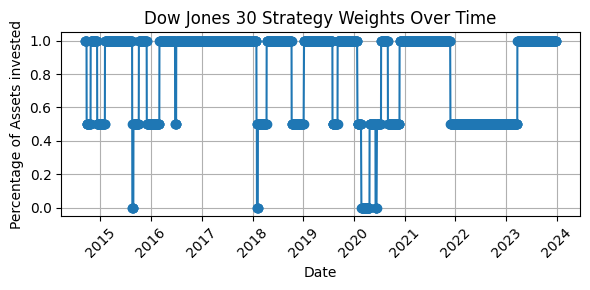

The Dow Jones 30 strategy stayed fully invested: 65.74% of the time
The Dow Jones 30 strategy stayed half invested: 31.74% of the time
The Dow Jones 30 strategy did not have any position: 2.52% of the time

Final Cumulative Performance of the strategy is: 265.19%
Final 'Simple' Performance of the strategy is: 133.64%


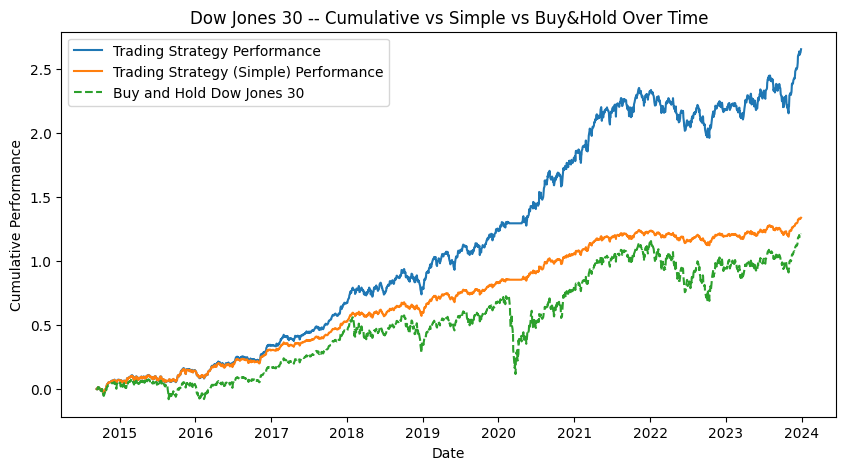


[*********************100%***********************]  1 of 1 completed

*********************************************

Analyzing Nasdaq 100 Returns.....

*********************************************

Test Score of: 7069.19002590138

AIC of Nasdaq 100: -30615.355217519056

BIC of Nasdaq 100: -30522.877233290586


Transition Probability Matrix: 

[[0.99570567 0.         0.00429433]
 [0.         0.98512668 0.01487332]
 [0.00654925 0.00635336 0.98709739]]

Nasdaq 100 Means and Variances of the states:

State 0: mean = 0.00088, variance = 0.0001

State 1: mean = -0.00214, variance = 0.00127

State 2: mean = 0.00088, variance = 0.00031



Nasdaq 100 Skewness and Kurtosis of the states:

State 0: Skewness = -0.009395863596622369, Kurtosis = -0.0958279807157516


State 1: Skewness = -0.03371405437027657, Kurtosis = -0.08957264254451225


State 2: Skewness = 0.0027616383606457054, Kurtosis = -0.003291783423075678



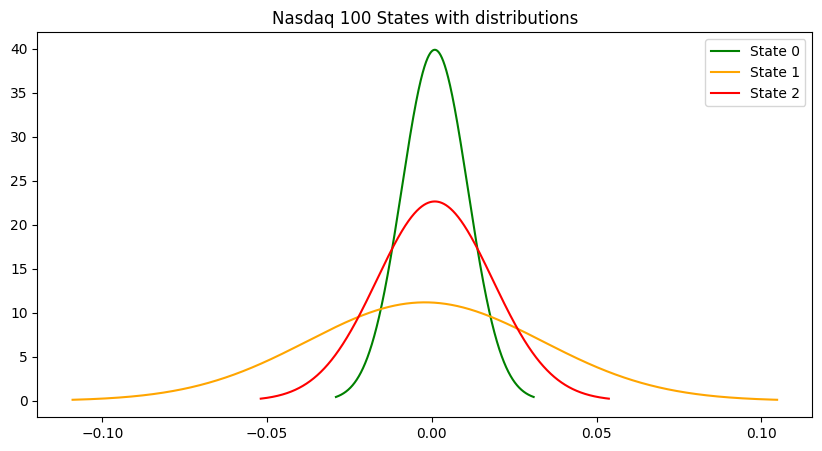

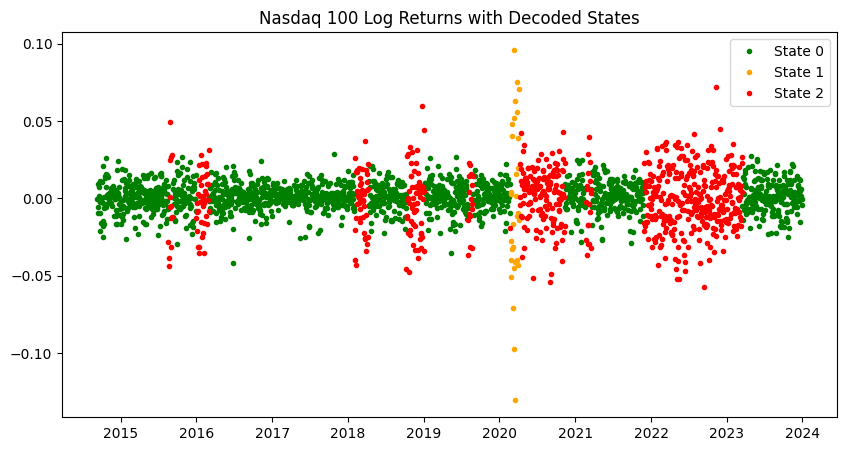

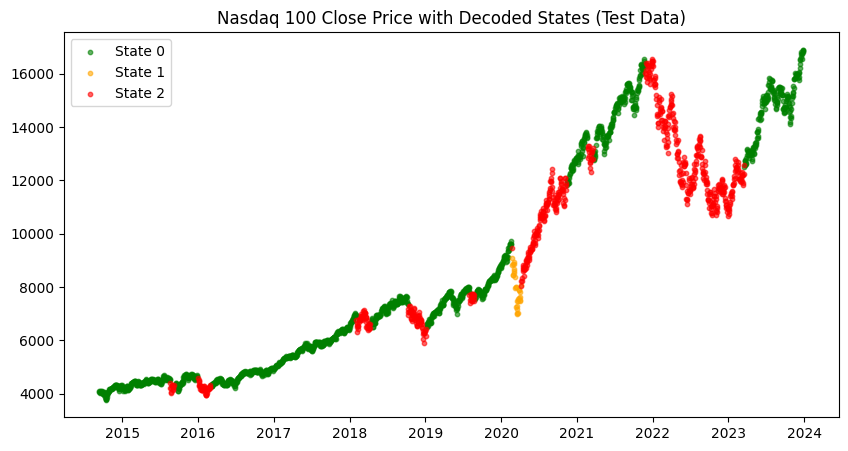


States means before the encoding:
State 0: 0.00113

State 1: -0.00503

State 2: -0.00042


State means after the encoding:
bullish: 0.00113

bearish: -0.00503

neutral: -0.00042



/var/folders/yv/d2dhvmn114n1xwsyx1cdm1380000gn/T/ipykernel_42537/1650987279.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.trade_log = pd.concat([self.trade_log, new_row], ignore_index=True)


           Date Action  Portfolio_Percentage    Open_Price
0    2014-09-12   Hold                   1.0   4087.169922
1    2014-09-15   Hold                   1.0   4070.199951
2    2014-09-16   Hold                   1.0   4012.530029
3    2014-09-17   Hold                   1.0   4066.760010
4    2014-09-18   Hold                   1.0   4084.510010
...         ...    ...                   ...           ...
2336 2023-12-22   Hold                   1.0  16799.019531
2337 2023-12-26   Hold                   1.0  16816.779297
2338 2023-12-27   Hold                   1.0  16896.140625
2339 2023-12-28   Hold                   1.0  16963.519531
2340 2023-12-29   Hold                   1.0  16902.439453

[2341 rows x 4 columns]


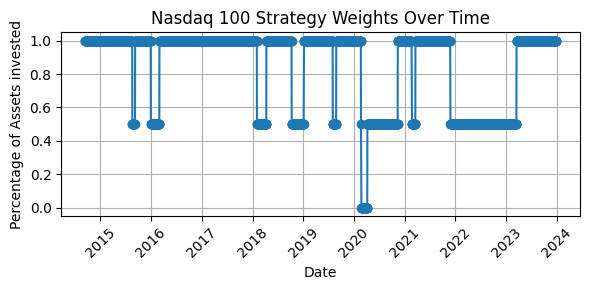

The Nasdaq 100 strategy stayed fully invested: 69.8% of the time
The Nasdaq 100 strategy stayed half invested: 28.88% of the time
The Nasdaq 100 strategy did not have any position: 1.32% of the time

Final Cumulative Performance of the strategy is: 524.71%
Final 'Simple' Performance of the strategy is: 193.54%


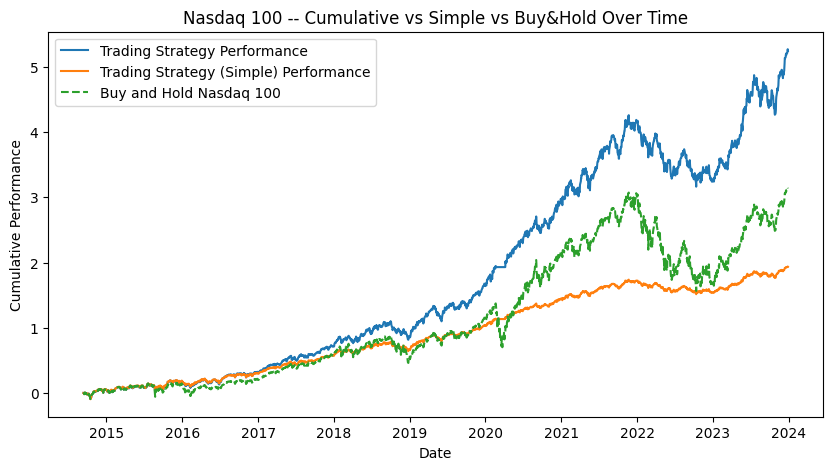


[*********************100%***********************]  1 of 1 completed

Model is not converging.  Current: 16538.917272532028 is not greater than 16539.07295015759. Delta is -0.15567762556383968




*********************************************

Analyzing Russel 2000 Returns.....

*********************************************

Test Score of: 6893.432152303028

AIC of Russel 2000: -33049.27479091435

BIC of Russel 2000: -32956.79680668588


Transition Probability Matrix: 

[[8.1875500e-03 3.9083480e-02 9.5272897e-01]
 [9.9260000e-05 9.9143763e-01 8.4631000e-03]
 [9.8563577e-01 9.4314200e-03 4.9328100e-03]]

Russel 2000 Means and Variances of the states:

State 0: mean = 0.00044, variance = 0.00051

State 1: mean = 0.00088, variance = 8e-05

State 2: mean = -0.0031, variance = 0.00057



Russel 2000 Skewness and Kurtosis of the states:

State 0: Skewness = 0.016704792731672847, Kurtosis = -0.019528442307471305


State 1: Skewness = 0.04390414931173702, Kurtosis = -0.023844000912869312


State 2: Skewness = -0.002317236772608113, Kurtosis = 0.0007275779771926949



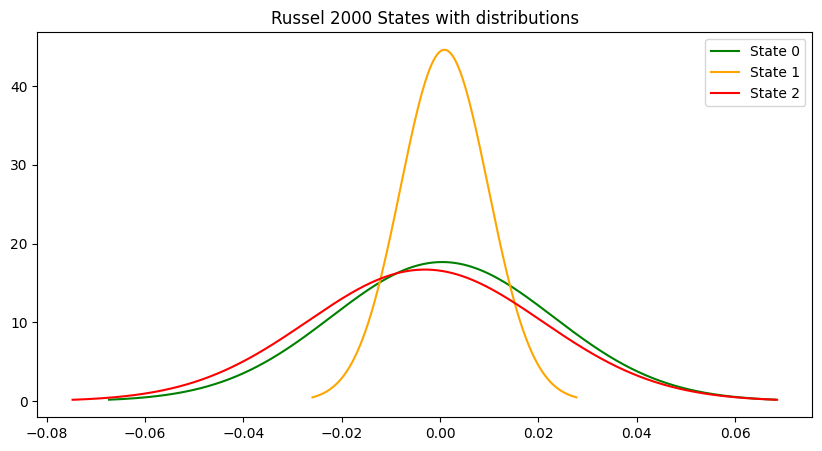

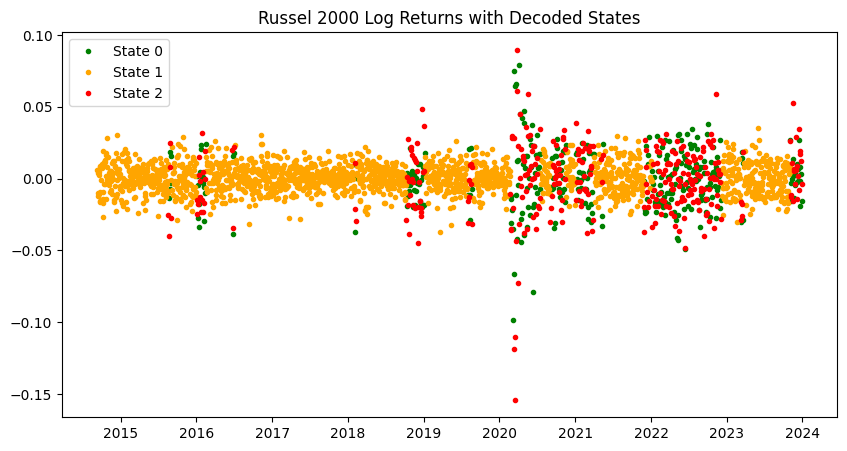

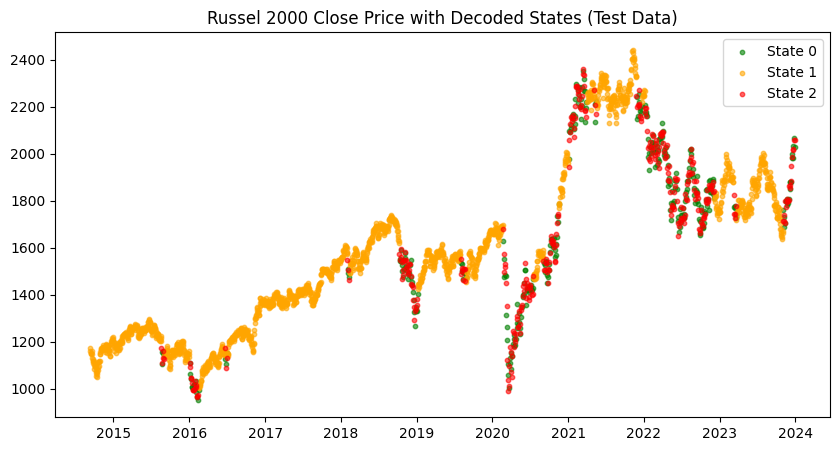


States means before the encoding:
State 0: -0.00056

State 1: 0.00065

State 2: -0.00115


State means after the encoding:
bullish: 0.00065

bearish: -0.00115

neutral: -0.00056



/var/folders/yv/d2dhvmn114n1xwsyx1cdm1380000gn/T/ipykernel_42537/1650987279.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.trade_log = pd.concat([self.trade_log, new_row], ignore_index=True)


           Date    Action  Portfolio_Percentage   Open_Price
0    2014-09-12      Hold                   1.0  1172.930054
1    2014-09-15      Hold                   1.0  1159.979980
2    2014-09-16      Hold                   1.0  1144.250000
3    2014-09-17      Hold                   1.0  1151.959961
4    2014-09-18      Hold                   1.0  1157.079956
...         ...       ...                   ...          ...
2336 2023-12-22  Buy Half                   0.5  2028.219971
2337 2023-12-26  Sell All                   0.0  2043.140015
2338 2023-12-27  Buy Half                   0.5  2063.590088
2339 2023-12-28  Sell All                   0.0  2058.179932
2340 2023-12-29  Buy Half                   0.5  2054.229980

[2341 rows x 4 columns]


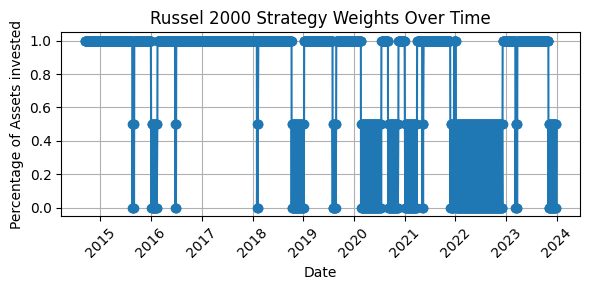

The Russel 2000 strategy stayed fully invested: 72.23% of the time
The Russel 2000 strategy stayed half invested: 13.88% of the time
The Russel 2000 strategy did not have any position: 13.88% of the time

Final Cumulative Performance of the strategy is: 190.12%
Final 'Simple' Performance of the strategy is: 115.95%


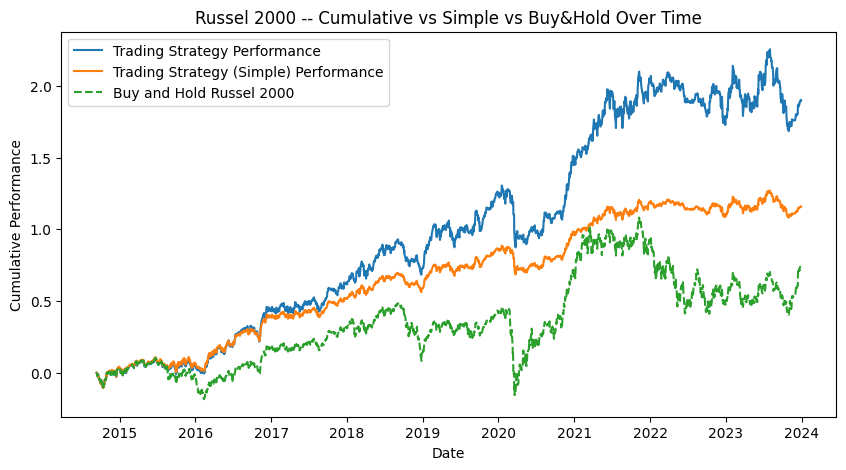

In [6]:
# Implementation
if __name__ == "__main__":
    start_date = "1993-01-01" #The available data starts at the end of the 1992 for simplicity i choose the start of 1993
    end_date = "2023-12-31"

    stock_symbols = {"^GSPC": "S&P 500", "^DJI": "Dow Jones 30", "^NDX": "Nasdaq 100", "^RUT": "Russel 2000"}

    for stock_symbol in stock_symbols:
        hmm_model = HiddenMarkovModel(stock_symbol, start_date, end_date)
        hmm_model.load_data()
        hmm_model.calculate_returns_log_and_linear()
        hmm_model.fit_hmm_model(n_components=3)
        hmm_model.plot_state_with_distributions()
        hmm_model.plot_test_with_states()
        hmm_model.plot_close_prices_with_states()
        hmm_model.calculate_test_log_returns()
        hmm_model.encode_states()
        hmm_model.check_correct_states_encoding()
        trading_strategy = TradingStrategy(hmm_model)
        trading_log = trading_strategy.implement_trading_strategy()
        print(trading_log)
        trading_strategy.plot_portfolio_weights(trading_log)
        trading_strategy.calculate_strategy_positions_time(trading_log)

        # Compute Strategy Performance
        trading_log_with_performance = calculate_daily_performance(trading_log)

        # Print Strategy Performance
        final_cumulative_performance = trading_log_with_performance['Cumulative_Performance'].iloc[-1]
        final_simple_performance = trading_log['Total_Performance'].iloc[-1]
        print()
        print(f"Final Cumulative Performance of the strategy is: {final_cumulative_performance * 100:.2f}%")
        print(f"Final 'Simple' Performance of the strategy is: {final_simple_performance * 100:.2f}%")


        # Plot strategy Performance
        plot_portfolio_performance(trading_log_with_performance)

S&P 500 Returns Data

Test Score: 7749.19
AIC:       -35440.45346256083
BIC:       -35347.97547833236


Transition Probability Matrix: 

[[0.98771431 0.01228569 0.        ]
 [0.01645406 0.9771714  0.00637455]
 [0.         0.03130098 0.96869902]]

Means and Variances of the states:

State 0: mean = 0.00084, variance = 4e-05

State 1: mean = -5e-05, variance = 0.00015

State 2: mean = -0.00181, variance = 0.0008

Skewness and Kurtosis of the states:

State 0: Skewness = 0.03859290499120448, Kurtosis = 0.07805050500763189

State 1: Skewness = 0.0009131004452334179, Kurtosis = -0.058849358754879955

State 2: Skewness = -0.015029937468729162, Kurtosis = -0.015966357045980928

### Commenting S&P 500 Analysis


The score method computes the log likelihood of the test data given the fitted model. The log likelihood is a measure of how well the model explains the observed data. A higher log likelihood means the model is a better fit to the data.
The value of the score is 7749.19 we will compare it with other assets score likely a metric used to evaluate the model's performance. 
AIC and BIC: These are criteria for model selection among a finite set of models. Lower values are generally better.
AIC (Akaike Information Criterion): The AIC for the S&P 500 is -35440.45346256083. It deals with the trade-off between the goodness of fit of the model and the complexity of the model.
BIC (Bayesian Information Criterion): The BIC for the S&P 500 is -35347.97547833236. Similar to AIC, it also balances fit and complexity but has a stronger penalty for models with more parameters.
Transition Probability Matrix: This matrix is a key component of a Markov model, showing the probability of transitioning from one state to another. 
The matrix is nearly diagonal, which suggests high probabilities of remaining in the same state (self-transitions).
For example, the probability of staying in state 1 is 0.9771714, and similarly high for state 2 with 0.96869902. The off-diagonal elements represent the probabilities of transitioning from one state to another, which are relatively low.

By considering mean, variance, skewness and kurtosis we can observe that the states of the s&p 500 have various characteristics: State 0 is a stable market with moderate positive returns and low volatility, as shown by a slight right skew and slightly heavier tails. State 1 indicates a stable but flat market with slightly negative returns and increased volatility, a near-zero skew, and fewer severe moves. State 2 indicates a riskier, bearish market with more dramatic negative returns and increased uncertainty, as shown by a left skew and flatter distribution with lower tail risk. These profiles help to understand market trends and strategize accordingly, with State 0 being cautiously hopeful, State 1 neutral, and State 2 pessimistic.

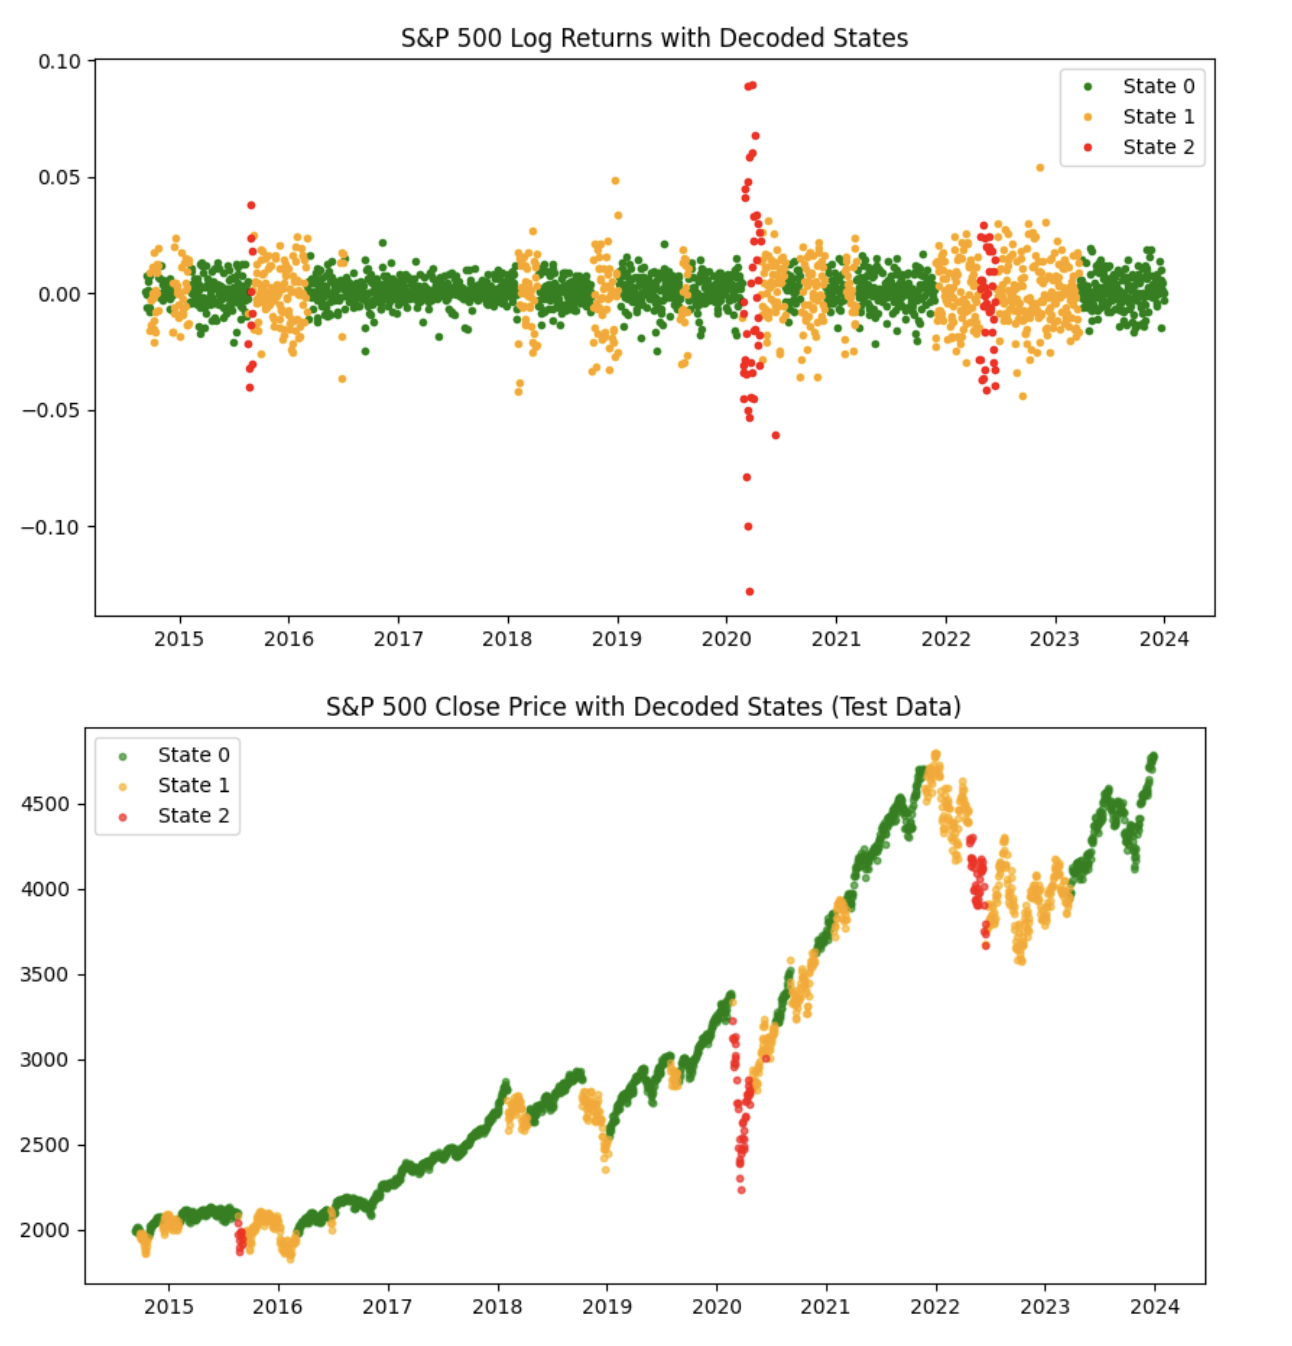

The images show the S&P 500 market behavior through different states, with the first graph showing log returns and the second showing closing prices, both filtered by market states. 

In the period around August/September 2015, the model captures a shift possibly correlating with the China stock market crash. The presence of State 2 (colored in red) indicates heightened volatility and negative returns, which is consistent with the real-world tumultuous market conditions of that time.

In the last quarter of 2018, the model identified medium volatility in the stock market. Factors like Trade wars and U.S. tariffs on China introduced uncertainty, while the Federal Reserve's rate hikes prompted fears of a slowdown. 
The model captured this nuanced volatility, reflecting the market's forward-looking nature and sensitivity to a blend of immediate economic health and anticipatory factors like policy changes and global tensions.

Moving to February/March 2020, we see a similar pattern of red dots, which aligns with the market shock induced by the onset of the COVID-19 pandemic. The model seems to have successfully identified this period as one of significant market stress, reflecting the sharp downturn and increased volatility as the global markets reacted to the pandemic's uncertainties.

In May 2022, the model once again shifts predominantly to State 2, corresponding to a period of market instability attributed to factors such as renewed lockdowns in China, the impact of the Ukraine conflict, and soaring inflation rates. This period of heightened volatility and negative returns reflects the deteriorating economic conditions observed globally.

From the end of 2021 into the first half of 2023, the model frequently assigns (like at the end of 2018) a period of medium volatility. This prolonged phase could be associated with the tightening monetary policies of central banks, characterized by rising interest rates to combat high inflation levels. The model's recognition of this state suggests it can track not only sudden market shocks but also prolonged periods of economic adjustment and policy response.

Overall, the model’s ability to map these states onto tangible market events suggests a robustness in capturing shifts in volatility and market sentiment, providing a valuable tool for understanding market dynamics and potentially aiding in decision-making processes for market participants.

The strategy uses simple rules to decide when to buy or sell the index based on what it thinks the market will do next. It looks at the market as having three moods: "bullish" when things look good and prices might go up, "neutral" when it's not clear what will happen, and "bearish" when things look bad and prices might go down.


The Viterbi Algorithm, which looks at all the possible states the market could be in the next day, predict the state of the next day and so whether the market will be "bullish," "neutral," or "bearish".


If the market is bullish and is expected to be bullish, we hold the positions. 
If it looks like it might be neutral, we sell half of the holdings, finally, if it the next day state is bearish we sell everything.

If the state is neutral – not clearly bullish or bearish – the strategy proceed with caution. 
If signs point to a shift towards a bullish market, we take the opportunity to increase our stock holdings. If the market's direction remains uncertain, the strategy do nothing and wait for clearer signals. 
However, if we anticipate a move towards a bearish market, the strategy sells all the holdings to safeguard against potential losses.

In a bearish market, where trends suggest declining performance, we avoid holding stocks. If the strategy predicts a turnaround towards a bullish trend, the asset is bought at maximum exposure. 
If there's a swith to neutral, the strategy buy half position in order to benefit if the market turns bullish, but limiting the exposure.

By adopting this approach, the strategy wants to maximize gains during bullish states and minimize losses during bearish ones.

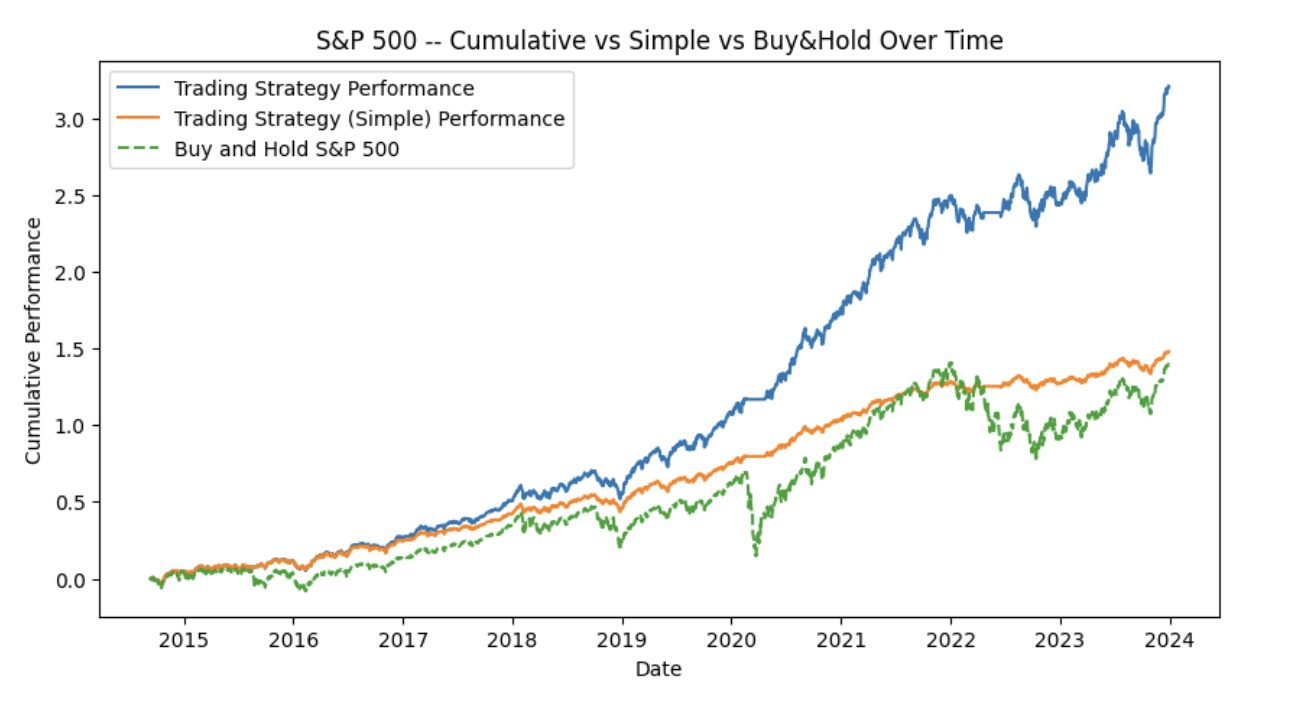

## Strategy exlanation

In the chart above, I plotted three distinct lines, each representing a different approach to investing in the stock market.

The blue line shows the cumulative performance of the strategy. 
This strategy involves putting all the money, including any profits made from previous investments, back into the market each time a purchase is made. 
Essentially, if this strategy earns money on one trade, it uses both the original investment and the earned profits to make the next trade. This method aims to maximize the potential growth of the investment by continuously compounding returns.

The orange line illustrates a more consistent, but less aggressive, strategy. Unlike the blue line's approach, this strategy involves investing a fixed amount of money every time, regardless of any profits made previously. This means it doesn’t take advantage of the compounding effect since it doesn’t reinvest the gains from earlier trades. Instead, it maintains a steady level of investment throughout, providing a more uniform view of the strategy's performance without the influence of compounding.

Finally, the green line represents the classic buy & hold approach. 
This is the simplest strategy, where an initial investment is made and then held over time, without any further buying or selling. It reflects the market's organic growth, riding out the highs and lows without any active trading maneuvers.



## S&P 500 Strategy Considerations

The lines above show three ways of dealing with stocks, and each has a different story. The blue line shows a strategy where we put all our money and profits back in most of the time – about 64.08% of the time, to be exact. This is a bold move, trying to make the most money possible. And it worked pretty well – the final result of this approach was a big increase of 320.67%!

The orange line is more careful. Instead of putting all the money back in, it just uses the same amount each time, no matter what. This strategy was half invested about 31.99% of the time. It's not as risky, so it didn't make as much money, but it still did okay with a 147.88% increase.

Then, there's the green line. This one is the simplest. You just buy stocks and hold onto them without doing much else. It's like planting a tree and just letting it grow. The S&P 500 strategy didn't invest at all 3.93% of the time.

By looking at all three lines, you can see how different choices can lead to different results in the stock market. The blue line shows that taking big risks can lead to big rewards, the orange line shows a safer but still effective way, and the green line shows what happens if you just let things be.

We can observe that the strategy works a bit like a buy & hold approach. It stayed fully invested about 64.08% of the time, which is an interesting fact. This means for most of the time. But differently from  a simple buy & hold approach, it stayed active, especially during times when the market was really volatile, like in August 2015, March/April 2020, and the first half of 2022.

This strategy showed a final cumulative performance of 320.67%, but it is partially thanks to the assumption that there were no transaction costs and no taxes on the profits (capital gains). 
Even though complete tax exemption can sometimes occur (due to instruments allowing for tax deferral or because certain countries do not impose such taxes), in the real world, there is always a minimum transaction cost associated with every trade, which can potentially reduce profits.

From the 'S&P 500 Strategy Weights Over Time' chart, we can observe that there were a significant number of trades taking place. The more trades that occur, the more these costs can have a detrimental impact on performance.

So, while the strategy may appear excellent on paper, in practice, it may not be as remarkable due to these transaction costs.

# Down Jones 30 and Nasdaq 

Examining the Dow Jones and Nasdaq, we see that their data closely resembles that of the S&P 500. When we look at the model scores, we see that the S&P 500 scores about 7749, the Dow Jones around 7819, and the Nasdaq around 7069. This shows that the Nasdaq performs slightly worse than the other two.

The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values follow a similar pattern. In these metrics, the Dow Jones and the S&P 500 are extremely similar. The Dow Jones has an AIC of -35828.3 and a BIC of -35735.8, whilst the S&P 500 has an AIC of -35440.5 and a BIC of -35348.0. The Nasdaq, while still showing great performance, has slightly lower numbers, with an AIC of -30615.4 and a BIC of -30522.9.

The Transition Probability Matrixes for all three indices, the Dow Jones, Nasdaq, and S&amp;P 500, are very similar. They are all highly likely to remain in the same state, demonstrating that market states change infrequently.

When comparing the states' means and variances, the Dow Jones has a mean of 0.00078 for the "bullish" state, -3e-05 for the neutral state, and -0.00245 for the bearish state. Regarding the Nasdaq, there is one thing to notice: the mean of two of the three states is 0.00088 (bullish and neutral), while the bearish condition is -0.00214. This observation is noteworthy and deserves more examination. It could be worthwhile to attempt modifying the model parameters to see if better results can be obtained. The S&P 500's means are 0.00084, -5e-05, and -0.00181, which are very comparable to the Dow Jones.

Furthermore, comparable patterns can be found in the variance, skewness, and kurtosis of the three models throughout all three states. As a result, the studies and observations produced for the S&P 500 can be broadly applied to the Dow Jones and Nasdaq as well.

## Performance Evaluation

Dow Jones 30 strategy:
- fully invested 65.74% of the time.
- Half invested 31.74% of the time.
- No position 2.52% of the time.

Nasdaq 100 strategy:
- Fully invested 69.8% of the time.
- Half invested 28.88% of the time.
- No market position 1.32% of the time.

S&P 500 strategy:
- fully invested 64.08% of the time.
- Half invested 31.99% of the time.
- No position 3.93% of the time.

Given the data, it is clear that also the strategies for the Dow Jones, and Nasdaq share many common characteristics with the one of the s&p 500. This convergence can be linked to the current high level of correlation in the markets. Despite representing companies from various sectors, all of these indices are part of the equity market. During times of risk-averse sentiment, such as a flight to safety, investors tend to sell stocks in favour of safer assets. This risk-averse behaviour affects all equity indices in a similar way.

A particularly interesting fact is that during the COVID-19 market crisis, all three strategies chose to avoid any market exposure. This decision underlines the pandemic's huge impact on markets, as well as the model's success. The model enabled  to avoid becoming completely exposed to such a significant market decline.

The fact that the Dow Jones and S&P 500 strategies had more instances of zero market exposure, while the Nasdaq strategy only had one period of zero market exposure (March/April 2020), is pretty noteworthy. This tendency can be attributed to the extraordinary prosperity experienced by major technology companies such as Apple, Microsoft, Nvidia, Tesla, and Google during last years.This difference in market exposure reflects the strenght of the technology sector. Also known as FAANG (Facebook, Apple, Amazon, Netflix, Google), these companies were the driving reasons behind the Nasdaq's impressive performance. 

This insight emphasises the significance of sector-specific factors while searching and experimenting new investment strategies. While the Dow Jones and S&P 500 strategies responded to broad market conditions, the Nasdaq strategy thanks to the underlying index, has performed very well. 

To understand this, we can compare the performance of alternative strategies to the Buy&Hold ones. For the Nasdaq, the "simple" strategy does not outperform buy and hold (this is the only case in which the strategy doesn't outperform the benchmark). For the Dow Jones, both simple and alternative strategies outperform the traditional buy-and-hold approach.

When we look at the strategy's cumulative performance, we can observe that it greatly increased Nasdaq performance. The cumulative method yielded approximately 520%, while the buy-and-hold strategy yielded around 330%. This demonstrates the need of reinvesting profits, as well as identifying which industries may perform well.

The Dow Jones and S&P 500 have very similar returns. The S&P 500 returned 320%, while the Dow Jones returned 265%. The S&P 500 had a straightforward performance of 147%, while the Dow Jones had 134%. This shows that various investment methods can produce varied outcomes across indices.

# Russell 2000

When we examine the Russell 2000 index, we see some intriguing trends, particularly in comparison to other indices. 

First, the Russell 2000's Test Score, AIC, and BIC are not significantly different from those of the other indexes. The Test Score is 6893.43, AIC = -33049.27, and BIC = -32956.80. This shows that the Russell 2000's general statistical qualities are comparable to the other main indices.

However, the Transition Probability Matrix reveals a large difference. Unlike the other indexes, where the diagonal elements (which measure the probability of the market remaining in the same state) were all near to one, the Russell 2000 has a distinct pattern. Here, only the middle element of the diagonal is close to one, indicating a high likelihood of remaining in the same state. This suggests that the Russell 2000 may see more frequent swings between particular market situations than the other indexes.

In terms of state means and variances, the Russell 2000 demonstrates a trend consistent with market regimes. State 0 has a mean of 0.00044 and a variance of 0.00051; State 1 has a mean of 0.00088 (the highest mean, indicating a bullish market regime) and the lowest variance of 8e-05; and State 2 has the lowest mean of -0.0031 and the highest variance of 0.00057, indicating a bearish market regime. The alignment of means and variances with market conditions is a frequent feature of most market indexes.

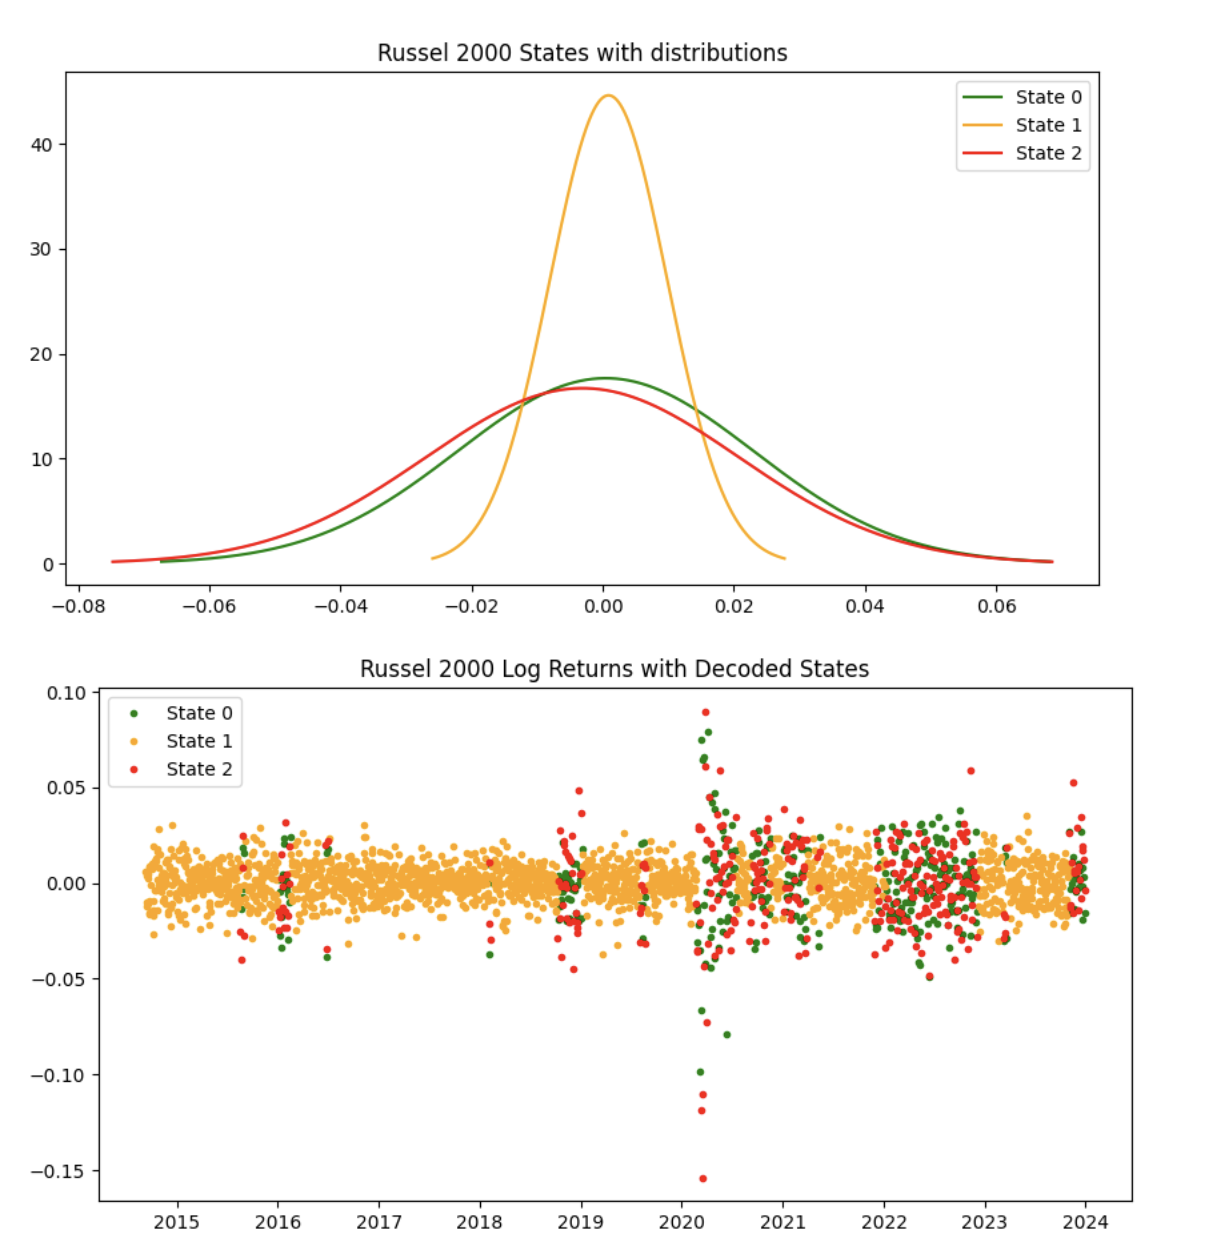

The chart shows two charts representing the Russell 2000 index states and their distributions. The top figure depicts three lines that indicate the distribution of log returns under three different market conditions. The distributions of States 0 and 2 do not overlap significantly, while State 1's distribution almost completely overlaps with State 2, indicating that the model may struggle to discriminate between these two states. This implies that market regime detection could be enhanced by reducing the number of regimes from three to two. This improvement could provide better difference and more insights, especially for mid-cap businesses like the Russell 2000, which differ from large-cap companies belonging to the S&P, NASDAQ, and Dow Jones indices.

The bottom graphic depicts the Russell 2000's log returns over time, with each point coloured according to the model's state assignment for that time period. Points of state 1 and state 2 are jumbled together, reflecting moments of uncertainty between medium and high volatility regimes. This is in contrast to previous analysis of the NASDAQ and S&P 500, which clearly classified such periods as low volatility (for the NASDAQ) or high volatility (for the S&P). Here, we have a more intermediate circumstance that does not appear to improve the model's clarity. Investigating the source of this disparity and incorporating the results into future evaluations of similar indices may improve the model's performance. 

## Performance Evaluation

Looking at the performance data for the Russell 2000 strategy, we can see that it did not perform poorly; in fact, it outperformed the buy&hold approach in both cumulative and 'simple' performance strategy. The strategy's cumulative performance provided a 190.12% return, while the'simple' performance yielded 115.95% (versus an 80% of the benchmark performance). 

However, it is worth noting that the strategy had no market position 13.88% of the time, which is much greater than the techniques used for other indices. This could be viewed as a benefit, given that the fundamental goal of the approach is to avoid market exposure during moments of extreme volatility and market crashes.

Nonetheless, given the prior investigations, which revealed an overlap in state distributions and raised issues about the transition probability matrix, it appears that further analysis is required. The overlap shows that the approach is not effectively discriminating between market regimes, and the differential transition probabilities may indicate a different market behaviour than other indexes. These points merit further examination to determine whether the Russell 2000's strategy could be optimised. 

# Future Developments

In the future, we can look into methods to improve this strategy. Technical indicators such as moving averages, relative strength, and stochastic oscillators may be beneficial in determining when to buy and sell an asset, as well as improving the approach.
There are additional macroeconomic and basic variables such as GDP growth, inflation rates, and interest rates that might influence the economic situation. 

Experimenting with different parameters (such as the number of states and covariance type) may also be interesting in trying to improve model performance. 

# Conclusions

I applied a simple 3-state hidden Markov model to try to detect different and predict regimes within the market. Considering the model simplicity, it has shown interesting results. It’s clear to me that this model has significant potential for further refinement.

To improve its performance, it is worth considering changing the model parameters. This could include fine-tuning the state transition probabilities or changing the emission parameters to better represent the dynamics of market movements. Furthermore, I'm considering adding extra variables that could affect the model's accuracy, such as macroeconomic indices or sector-specific trends.

Furthermore, the sorts of assets being analysed may alter the model's effectiveness. Adapting the model to specific asset classes, such as single stocks, bonds, commodities or currencies can provide better results. 